Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).

Below, please fill in your name and collaborators:

In [1]:
NAME = "Farnoush"

# Assignment 2 - Time Series Analysis
**(30 points total)**

## Assignment tasks:

In this assignment you will conduct time series analysis of the financial data. 

1. Setup your environment to access and download latest stock data. You will use the Yahoo Finance library. To install it, you will need to run this code: pip install yfinance

2. *(4 points)* Download the **adjusted** close prices for FB, MMM, IBM and AMZN for the last 60 months. 

3. *(6 points)* Resample the data to get prices for the end of the **business** month. Select the **Adjusted Close** for each stock.

4. *(6 points)* Use the pandas `autocorrelation_plot()` function to plot the autocorrelation of the adjusted month-end close prices for each of the stocks.
    - Are they autocorrelated?
    - Provide short explanation.

5. *(8 points)* 
    - Calculate the monthly returns for each stock using the "shift trick" explained in the lecture, using `shift()` function. 
    - Use pandas `autotocorrelation_plot()` to plot the autocorrelation of the monthly returns.
    - Are the returns autocorrelated? Provide short explanation.

6. *(6 points)*
    - Combine all 4 time series (returns) into a single DataFrame,
    - Visualize the correlation between the returns of all pairs of stocks using a scatter plot matrix (use `scatter_matrix()` function from `pandas.plotting`).
    - Explain the results. Is there any correlation?

**NOTES:** 
1. In this assignment, please make sure the DataFrame(s) do not contain any NAs before you plot autocorrelations or scatter matrix.
2. Both options explained below use `pandas-datareader` package for remote data access. To install it, type the following in a command window: `conda install pandas-datareader`. You will also need to install one or more of the following packages `yfinance`.

---------

In [2]:
 pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install fix_yahoo_finance --upgrade

Note: you may need to restart the kernel to use updated packages.


### Import all the relevant libraries and follow the examples below for importing data.

In [4]:
import yfinance as yf
from pandas_datareader import data as pdr
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import datetime
import pandas_datareader.data as web

In [5]:
from pandas.plotting import scatter_matrix

In [6]:
import matplotlib.pyplot as plt

#### Question 1:

In [7]:
start = datetime.datetime(2019,11,1)
end = datetime.datetime(2024,11,1)

In [8]:
# Option 2) Using yfinance library only to download AMZN data

amzn = yf.download('AMZN', start=start, end=end)
ibm  = yf.download('IBM', start=start, end=end)
meta = yf.download('META', start=start, end=end)
mmm  = yf.download('MMM', start=start, end=end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [9]:
print(amzn,ibm,meta,mmm)

Price                       Adj Close       Close        High         Low  \
Ticker                           AMZN        AMZN        AMZN        AMZN   
Date                                                                        
2019-11-01 00:00:00+00:00   89.571999   89.571999   89.872498   89.260498   
2019-11-04 00:00:00+00:00   90.233002   90.233002   90.752998   90.050499   
2019-11-05 00:00:00+00:00   90.085503   90.085503   90.512497   89.699997   
2019-11-06 00:00:00+00:00   89.788498   89.788498   90.125000   89.429001   
2019-11-07 00:00:00+00:00   89.410004   89.410004   90.294998   89.174004   
...                               ...         ...         ...         ...   
2024-10-25 00:00:00+00:00  187.830002  187.830002  190.449997  187.529999   
2024-10-28 00:00:00+00:00  188.389999  188.389999  190.210007  188.210007   
2024-10-29 00:00:00+00:00  190.830002  190.830002  191.460007  187.820007   
2024-10-30 00:00:00+00:00  192.729996  192.729996  195.610001  192.419998   

In [10]:
#amzn=pd.read_csv(r"C:\Users\msfar\OneDrive\Desktop\Python 2- UOT\Module 2\amzn.csv")
#ibm=pd.read_csv(r"C:\Users\msfar\OneDrive\Desktop\Python 2- UOT\Module 2\ibm.csv")
#meta=pd.read_csv(r"C:\Users\msfar\OneDrive\Desktop\Python 2- UOT\Module 2\meta.csv")
#mmm=pd.read_csv(r"C:\Users\msfar\OneDrive\Desktop\Python 2- UOT\Module 2\mmm.csv")

In [11]:
amzn.isnull().values.any()

False

In [12]:
ibm.isnull().values.any()

False

In [13]:
meta.isnull().values.any()

False

In [14]:
mmm.isnull().values.any()

False

#### Question 2 & 3:

In [15]:
ibm = ibm['Adj Close']

In [16]:
ibm.head()

Ticker,IBM
Date,
2019-11-01 00:00:00+00:00,102.282387
2019-11-04 00:00:00+00:00,103.897408
2019-11-05 00:00:00+00:00,104.063423
2019-11-06 00:00:00+00:00,104.735115
2019-11-07 00:00:00+00:00,105.139801


In [17]:
ibm_end = ibm.resample('BM').last()

In [18]:
ibm_end

Ticker,IBM
Date,
2019-11-29 00:00:00+00:00,102.665756
2019-12-31 00:00:00+00:00,102.352676
2020-01-31 00:00:00+00:00,109.751923
2020-02-28 00:00:00+00:00,100.420044
2020-03-31 00:00:00+00:00,85.590454
2020-04-30 00:00:00+00:00,96.878525
2020-05-29 00:00:00+00:00,97.661736
2020-06-30 00:00:00+00:00,94.432404
2020-07-31 00:00:00+00:00,96.129150


In [19]:
amzn = amzn['Adj Close']

In [20]:
amzn.head()

Ticker,AMZN
Date,
2019-11-01 00:00:00+00:00,89.571999
2019-11-04 00:00:00+00:00,90.233002
2019-11-05 00:00:00+00:00,90.085503
2019-11-06 00:00:00+00:00,89.788498
2019-11-07 00:00:00+00:00,89.410004


In [21]:
amzn_end = amzn.resample('BM').last()

In [22]:
amzn_end

Ticker,AMZN
Date,
2019-11-29 00:00:00+00:00,90.040001
2019-12-31 00:00:00+00:00,92.391998
2020-01-31 00:00:00+00:00,100.435997
2020-02-28 00:00:00+00:00,94.187500
2020-03-31 00:00:00+00:00,97.486000
2020-04-30 00:00:00+00:00,123.699997
2020-05-29 00:00:00+00:00,122.118500
2020-06-30 00:00:00+00:00,137.940994
2020-07-31 00:00:00+00:00,158.233994


In [23]:
meta=meta['Adj Close']

In [24]:
meta.head()

Ticker,META
Date,
2019-11-01 00:00:00+00:00,193.038773
2019-11-04 00:00:00+00:00,194.135498
2019-11-05 00:00:00+00:00,193.736694
2019-11-06 00:00:00+00:00,190.975006
2019-11-07 00:00:00+00:00,189.848389


In [25]:
meta_end = meta.resample('BM').last()

In [26]:
meta_end

Ticker,META
Date,
2019-11-29 00:00:00+00:00,201.034698
2019-12-31 00:00:00+00:00,204.633881
2020-01-31 00:00:00+00:00,201.303909
2020-02-28 00:00:00+00:00,191.892242
2020-03-31 00:00:00+00:00,166.299301
2020-04-30 00:00:00+00:00,204.095505
2020-05-29 00:00:00+00:00,224.414307
2020-06-30 00:00:00+00:00,226.388382
2020-07-31 00:00:00+00:00,252.908524


In [27]:
mmm=mmm['Adj Close']

In [28]:
mmm.head()

Ticker,MMM
Date,
2019-11-01 00:00:00+00:00,115.806656
2019-11-04 00:00:00+00:00,119.081551
2019-11-05 00:00:00+00:00,119.333466
2019-11-06 00:00:00+00:00,118.468811
2019-11-07 00:00:00+00:00,118.822853


In [29]:
mmm.columns

Index(['MMM'], dtype='object', name='Ticker')

In [30]:
mmm_end = mmm.resample('BM').last()

In [31]:
mmm_end

Ticker,MMM
Date,
2019-11-29 00:00:00+00:00,116.589493
2019-12-31 00:00:00+00:00,121.156364
2020-01-31 00:00:00+00:00,108.959686
2020-02-28 00:00:00+00:00,103.418648
2020-03-31 00:00:00+00:00,94.597153
2020-04-30 00:00:00+00:00,105.275780
2020-05-29 00:00:00+00:00,109.483238
2020-06-30 00:00:00+00:00,109.168312
2020-07-31 00:00:00+00:00,105.305176


#### Question 4:

In [32]:
from statsmodels.graphics.tsaplots import plot_pacf

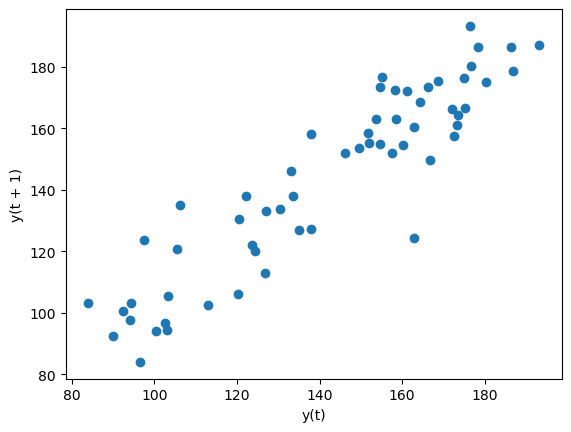

In [33]:
amzn_lag = pd.plotting.lag_plot(series=amzn_end, lag=1)

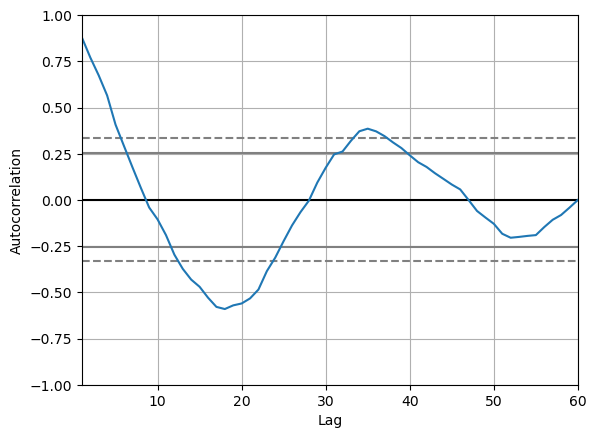

In [34]:
amzn_autocorrelation=pd.plotting.autocorrelation_plot(amzn_end)

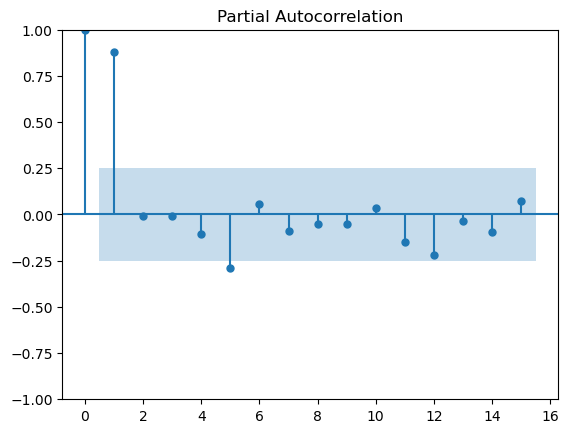

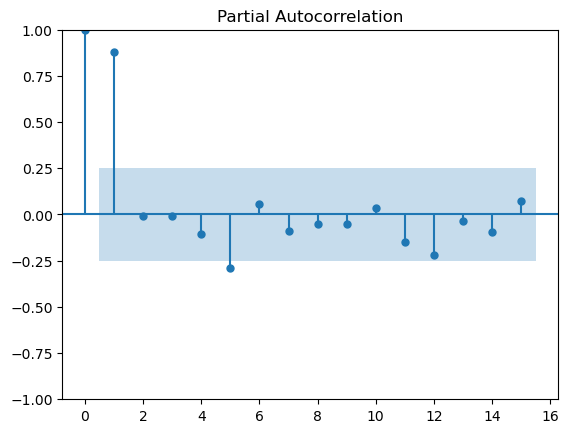

In [35]:
plot_pacf(amzn_end["AMZN"], lags = 15)

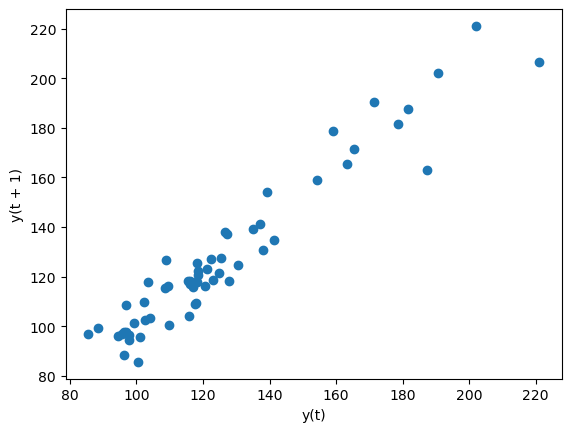

In [36]:
ibm_lag = pd.plotting.lag_plot(series=ibm_end, lag=1)

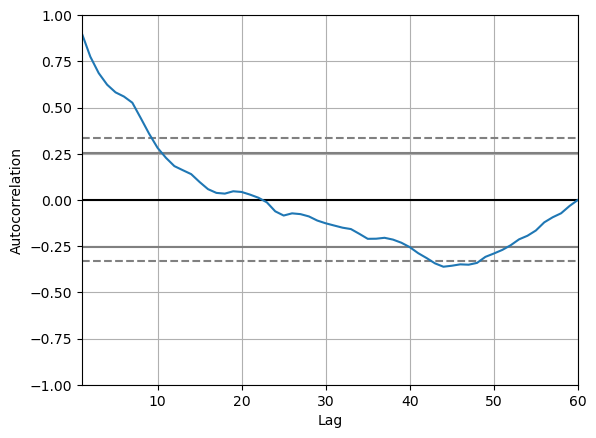

In [37]:
ibm_autocorrelation=pd.plotting.autocorrelation_plot(ibm_end)

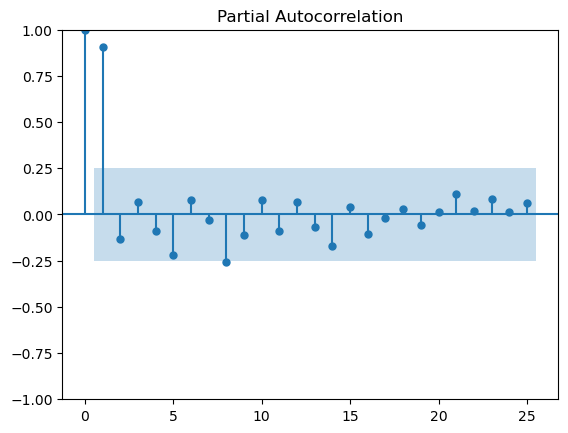

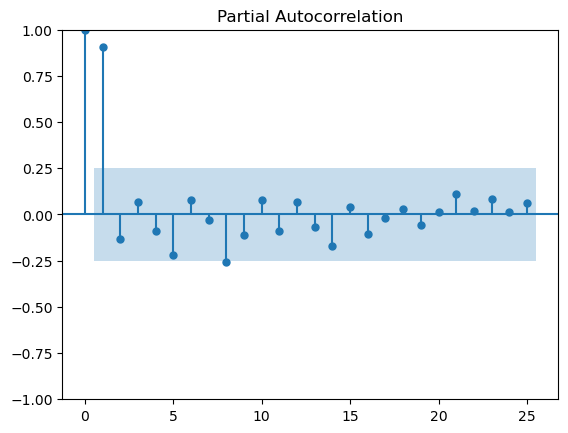

In [38]:
plot_pacf(meta_end["META"], lags = 25)

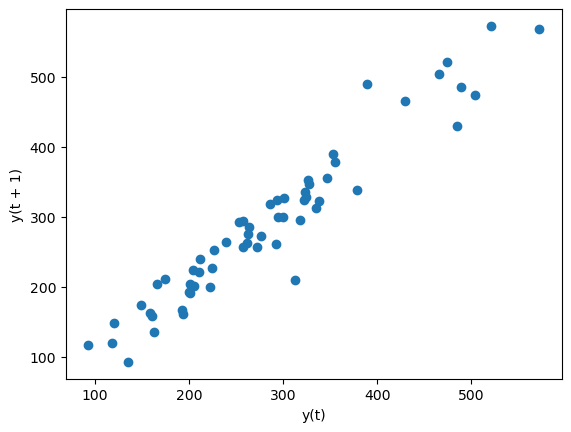

In [39]:
meta_lag = pd.plotting.lag_plot(series=meta_end, lag=1)

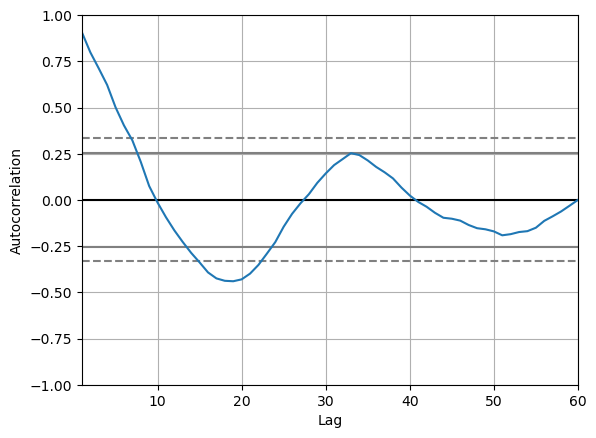

In [40]:
meta_autocorrelation=pd.plotting.autocorrelation_plot(meta_end)

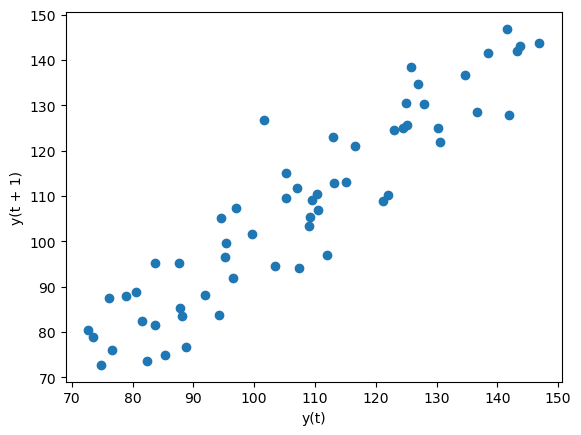

In [41]:
mmm_lag = pd.plotting.lag_plot(series=mmm_end, lag=1)

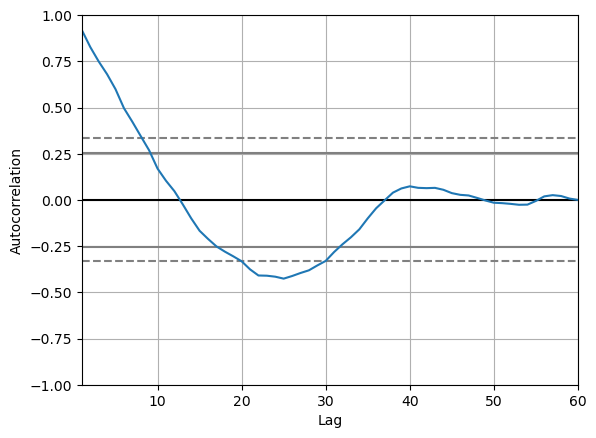

In [42]:
mmm_autocorrelation=pd.plotting.autocorrelation_plot(mmm_end)

There is seasonal correlation for meta and amazon's stock.

They all have a strong  positive correlation with the first lag, meaning if a stock is rising on day, the next day it is still rising or if it is decreasing, the next day it is still dcreasing.

#### Question 5:

There is a bit of correlation that is can be noticibale for Amazon which slightly goes over 0.25 but other than that, there aren't any significant correlation for any of the stocks. I just can say the coefficient is seasonal.

In [43]:
amzn_return=amzn_end - amzn_end.shift(1)

In [44]:
amzn_return.head()

Ticker,AMZN
Date,
2019-11-29 00:00:00+00:00,NaN
2019-12-31 00:00:00+00:00,2.351997
2020-01-31 00:00:00+00:00,8.043999
2020-02-28 00:00:00+00:00,-6.248497
2020-03-31 00:00:00+00:00,3.298500


In [45]:
#amzn_end["lag1"] = amzn_end["AMZN"].shift(1)

In [46]:
amzn_return=amzn_return.dropna()

In [47]:
amzn_return.head()

Ticker,AMZN
Date,
2019-12-31 00:00:00+00:00,2.351997
2020-01-31 00:00:00+00:00,8.043999
2020-02-28 00:00:00+00:00,-6.248497
2020-03-31 00:00:00+00:00,3.298500
2020-04-30 00:00:00+00:00,26.213997


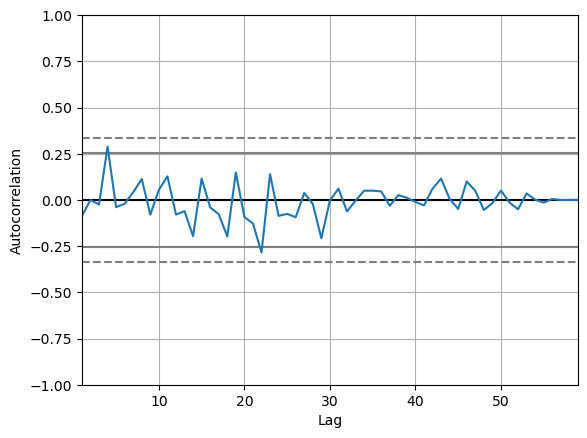

In [48]:
amzn_return_auto=pd.plotting.autocorrelation_plot(amzn_return)

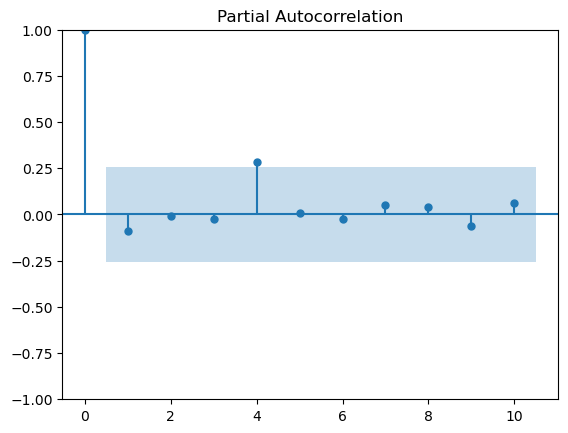

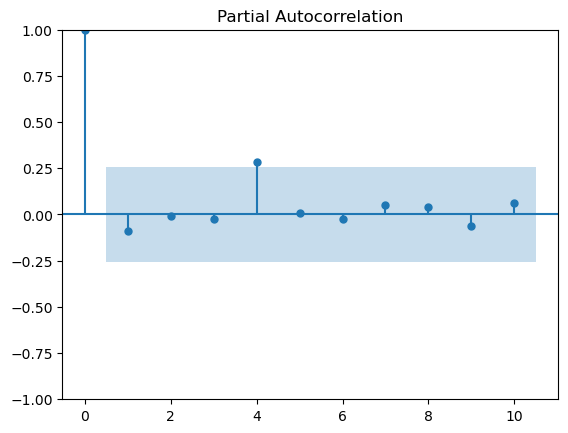

In [49]:
plot_pacf(amzn_return["AMZN"], lags = 10)

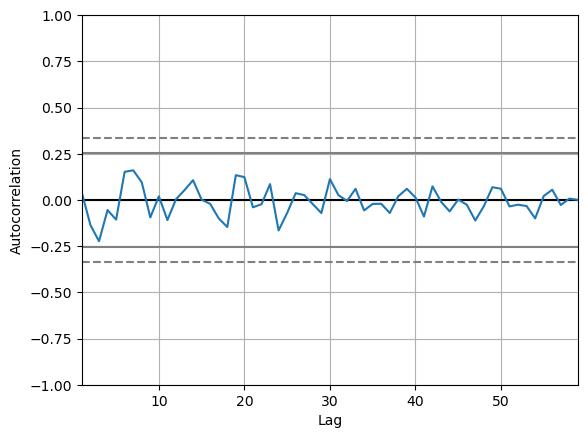

In [50]:
ibm_return=ibm_end - ibm_end.shift(1)
ibm_return.dropna(inplace=True)
ibm_return_auto=pd.plotting.autocorrelation_plot(ibm_return)

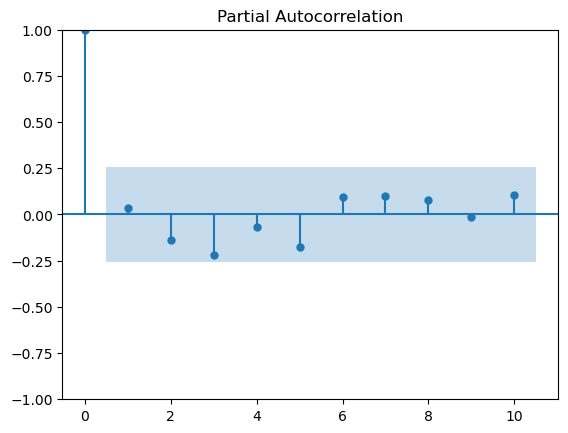

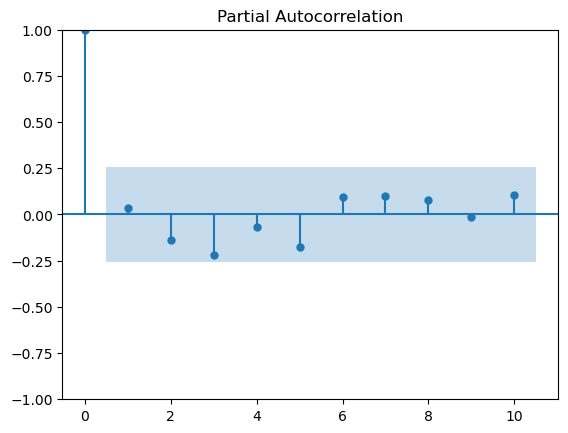

In [51]:
plot_pacf(ibm_return["IBM"], lags = 10)

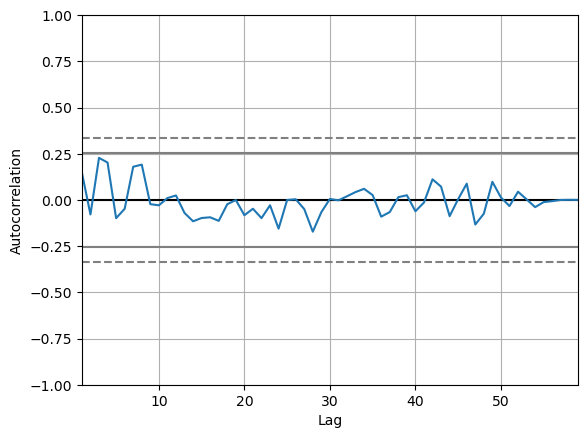

In [52]:
meta_return=meta_end - meta_end.shift(1)
meta_return.dropna(inplace=True)
meta_return_auto=pd.plotting.autocorrelation_plot(meta_return)

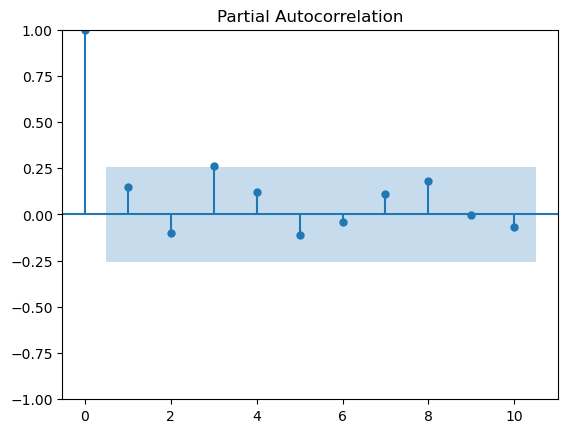

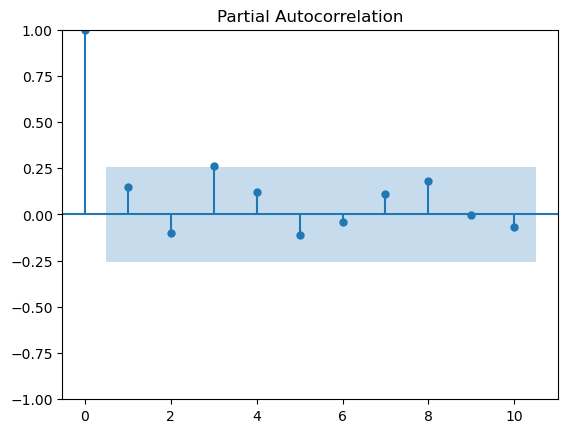

In [53]:
plot_pacf(meta_return["META"], lags = 10)

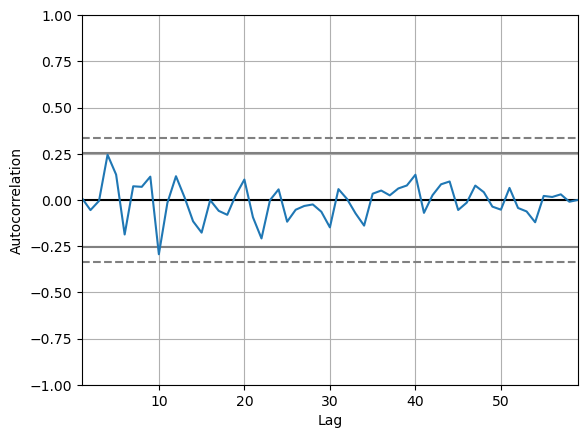

In [54]:
mmm_return=mmm_end - mmm_end.shift(1)
mmm_return.dropna(inplace=True)
mmm_return_auto=pd.plotting.autocorrelation_plot(mmm_return)

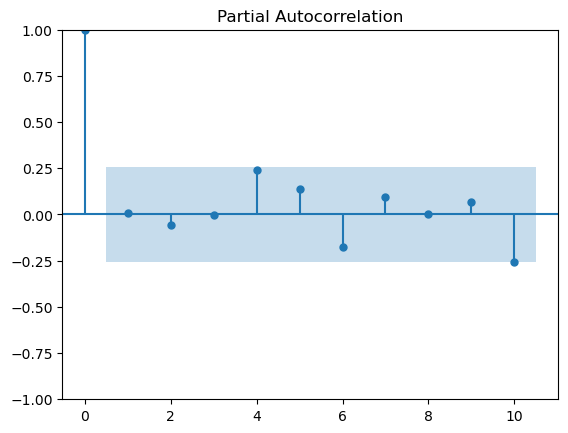

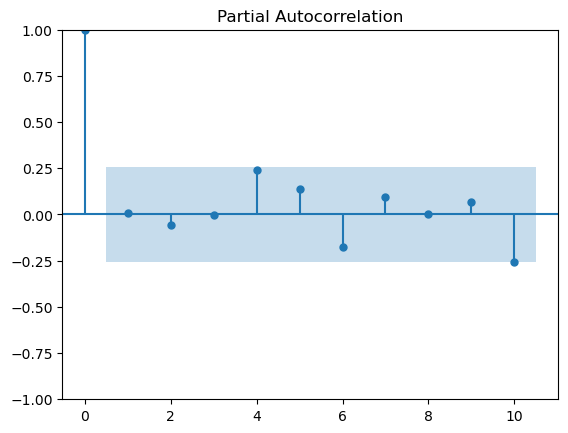

In [55]:
plot_pacf(mmm_return["MMM"], lags = 10)

ALL of them barely show any remarkable autocorrelation, Amazon, IBM and Meta returns show a small autocorrelation with the 3rd lag and MMM shows a small autocorrolation with the 4th lag.

#### Question 6:

In [56]:

result = pd.concat([amzn_return, ibm_return,meta_return,mmm_return], axis=1) 

In [57]:
result

Ticker,AMZN,IBM,META,MMM
Date,,,,
2019-12-31 00:00:00+00:00,2.351997,-0.313080,3.599182,4.566872
2020-01-31 00:00:00+00:00,8.043999,7.399246,-3.329971,-12.196678
2020-02-28 00:00:00+00:00,-6.248497,-9.331879,-9.411667,-5.541039
2020-03-31 00:00:00+00:00,3.298500,-14.829590,-25.592941,-8.821495
2020-04-30 00:00:00+00:00,26.213997,11.288071,37.796204,10.678627
2020-05-29 00:00:00+00:00,-1.581497,0.783211,20.318802,4.207458
2020-06-30 00:00:00+00:00,15.822495,-3.229332,1.974075,-0.314926
2020-07-31 00:00:00+00:00,20.292999,1.696747,26.520142,-3.863136
2020-08-31 00:00:00+00:00,14.314011,1.551750,39.411362,9.821487


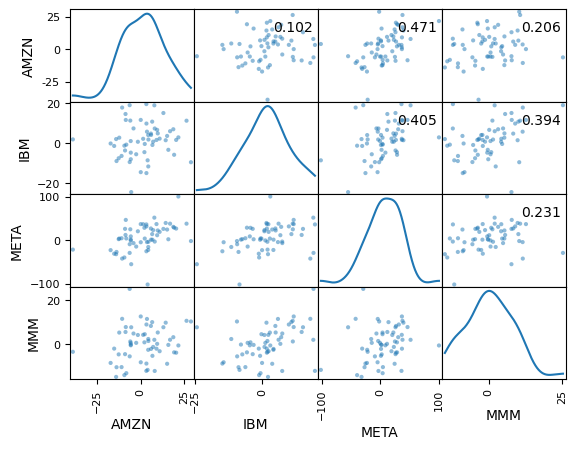

In [58]:
axes = scatter_matrix(result, alpha=0.5, diagonal='kde')
corr = result.corr().to_numpy()
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.show()

I believe we can say there is a slight correlation between IBM's return and Meta's return and Amazon's return and Meta's retun as well but the rest are less than 0.4 which I don't think it is that significant!